#Dog vs Cat


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats --force

100% 811M/812M [00:10<00:00, 149MB/s]
100% 812M/812M [00:10<00:00, 79.3MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data  sampleSubmission.csv  test1.zip  train  train.zip


In [5]:
# extracting
from zipfile import ZipFile

data = '/content/dogs-vs-cats.zip'

with ZipFile(data,'r') as zip:
  zip.extractall()
  print('The data has been extracted!')

The data has been extracted!


In [6]:
from zipfile import ZipFile

data = '/content/train.zip'

with ZipFile(data,'r') as zip:
  zip.extractall()
  print('The data has been extracted!')

The data has been extracted!


In [7]:
import os
path, dirs, files = next(os.walk('/content/train'))
print('Number of images :',len(files))

Number of images : 25000


In [8]:
print(os.listdir('/content/train'))

['cat.2409.jpg', 'dog.740.jpg', 'dog.4890.jpg', 'dog.3503.jpg', 'dog.5186.jpg', 'dog.6744.jpg', 'cat.12140.jpg', 'cat.4386.jpg', 'dog.4587.jpg', 'dog.7239.jpg', 'cat.3696.jpg', 'cat.8299.jpg', 'cat.11016.jpg', 'dog.1082.jpg', 'dog.2993.jpg', 'dog.1371.jpg', 'dog.3888.jpg', 'dog.4805.jpg', 'dog.10488.jpg', 'cat.525.jpg', 'dog.6793.jpg', 'cat.2479.jpg', 'cat.10853.jpg', 'dog.9219.jpg', 'cat.11669.jpg', 'dog.6389.jpg', 'cat.6067.jpg', 'dog.1812.jpg', 'dog.2743.jpg', 'dog.8080.jpg', 'dog.2896.jpg', 'dog.9172.jpg', 'cat.4383.jpg', 'cat.6344.jpg', 'cat.11345.jpg', 'cat.5721.jpg', 'cat.3997.jpg', 'cat.3268.jpg', 'dog.6821.jpg', 'cat.9574.jpg', 'dog.602.jpg', 'dog.3025.jpg', 'dog.12410.jpg', 'cat.852.jpg', 'dog.9942.jpg', 'dog.319.jpg', 'cat.9826.jpg', 'cat.7758.jpg', 'dog.4792.jpg', 'cat.6668.jpg', 'dog.7351.jpg', 'cat.5136.jpg', 'cat.2784.jpg', 'cat.10979.jpg', 'dog.6448.jpg', 'cat.1357.jpg', 'cat.8620.jpg', 'dog.9663.jpg', 'cat.2865.jpg', 'dog.7236.jpg', 'cat.10694.jpg', 'cat.1826.jpg', 'do

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

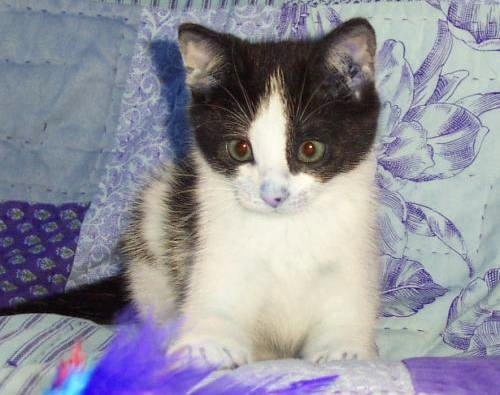

In [10]:
img = mping.imread('/content/train/cat.2409.jpg')
cv2_imshow(img)

In [11]:
img.shape

(395, 500, 3)

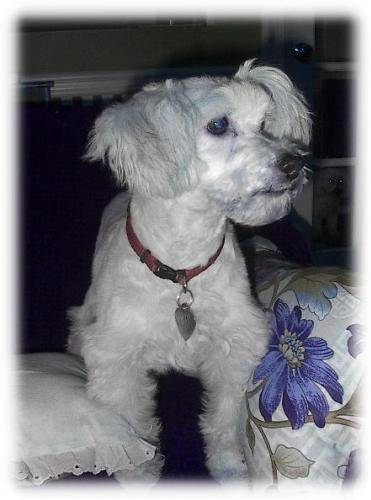

In [12]:
img2 = mping.imread('/content/train/dog.5186.jpg')
cv2_imshow(img2)

In [13]:
img2.shape

(500, 371, 3)

In [43]:
file_names = os.listdir('/content/train')
dog_count = 0
cat_count = 0

for img_name in file_names[0:2000]:
  name = img_name[0:3]

  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print("Number of dog images =",dog_count)
print("Number of cat images =",cat_count)

Number of dog images = 999
Number of cat images = 1001


In [15]:
# Since I am using transfer learning we dont need much data
# only the first 4000 images are needed
orig_size = file_names[:2000]
orig_size = ['/content/train/'+ img_name for img_name in orig_size]
print(orig_size)

['/content/train/cat.2409.jpg', '/content/train/dog.740.jpg', '/content/train/dog.4890.jpg', '/content/train/dog.3503.jpg', '/content/train/dog.5186.jpg', '/content/train/dog.6744.jpg', '/content/train/cat.12140.jpg', '/content/train/cat.4386.jpg', '/content/train/dog.4587.jpg', '/content/train/dog.7239.jpg', '/content/train/cat.3696.jpg', '/content/train/cat.8299.jpg', '/content/train/cat.11016.jpg', '/content/train/dog.1082.jpg', '/content/train/dog.2993.jpg', '/content/train/dog.1371.jpg', '/content/train/dog.3888.jpg', '/content/train/dog.4805.jpg', '/content/train/dog.10488.jpg', '/content/train/cat.525.jpg', '/content/train/dog.6793.jpg', '/content/train/cat.2479.jpg', '/content/train/cat.10853.jpg', '/content/train/dog.9219.jpg', '/content/train/cat.11669.jpg', '/content/train/dog.6389.jpg', '/content/train/cat.6067.jpg', '/content/train/dog.1812.jpg', '/content/train/dog.2743.jpg', '/content/train/dog.8080.jpg', '/content/train/dog.2896.jpg', '/content/train/dog.9172.jpg', '/co

In [16]:
os.mkdir('/content/train_image_resized/')
resized_path = '/content/train_image_resized/'

for img_path in orig_size:
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB') # precaution incase an image is not RGB
  new_path = img_path.replace('/content/train/',resized_path)
  img.save(new_path)

print(os.listdir('/content/train_image_resized/'))

['cat.2409.jpg', 'dog.740.jpg', 'dog.4890.jpg', 'dog.3503.jpg', 'dog.5186.jpg', 'dog.6744.jpg', 'cat.12140.jpg', 'cat.4386.jpg', 'dog.4587.jpg', 'dog.7239.jpg', 'cat.3696.jpg', 'cat.8299.jpg', 'cat.11016.jpg', 'dog.1082.jpg', 'dog.2993.jpg', 'dog.1371.jpg', 'dog.3888.jpg', 'dog.4805.jpg', 'dog.10488.jpg', 'cat.525.jpg', 'dog.6793.jpg', 'cat.2479.jpg', 'cat.10853.jpg', 'dog.9219.jpg', 'cat.11669.jpg', 'dog.6389.jpg', 'cat.6067.jpg', 'dog.1812.jpg', 'dog.2743.jpg', 'dog.8080.jpg', 'dog.2896.jpg', 'dog.9172.jpg', 'cat.4383.jpg', 'cat.6344.jpg', 'cat.11345.jpg', 'cat.5721.jpg', 'cat.3997.jpg', 'cat.3268.jpg', 'dog.6821.jpg', 'cat.9574.jpg', 'dog.602.jpg', 'dog.3025.jpg', 'dog.12410.jpg', 'cat.852.jpg', 'dog.9942.jpg', 'dog.319.jpg', 'cat.9826.jpg', 'cat.7758.jpg', 'dog.4792.jpg', 'cat.6668.jpg', 'dog.7351.jpg', 'cat.5136.jpg', 'cat.2784.jpg', 'cat.10979.jpg', 'dog.6448.jpg', 'cat.1357.jpg', 'cat.8620.jpg', 'dog.9663.jpg', 'cat.2865.jpg', 'dog.7236.jpg', 'cat.10694.jpg', 'cat.1826.jpg', 'do

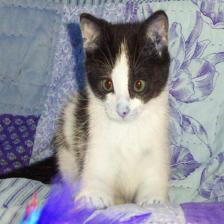

In [17]:
img = mping.imread('/content/train_image_resized/cat.2409.jpg')
cv2_imshow(img)

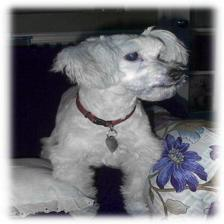

In [18]:
img = mping.imread('/content/train_image_resized/dog.5186.jpg')
cv2_imshow(img)

Creating Labels

cat --> 0

dog --> 1

In [19]:
file_names = os.listdir('/content/train_image_resized')
labels = []
for img in file_names:
  name = img[:3]
  if name == 'dog':
    labels.append(1)
  else:
    labels.append(0)

print([(file_names[i],labels[i]) for i in range(20)])

[('cat.2409.jpg', 0), ('dog.740.jpg', 1), ('dog.4890.jpg', 1), ('dog.3503.jpg', 1), ('dog.5186.jpg', 1), ('dog.6744.jpg', 1), ('cat.12140.jpg', 0), ('cat.4386.jpg', 0), ('dog.4587.jpg', 1), ('dog.7239.jpg', 1), ('cat.3696.jpg', 0), ('cat.8299.jpg', 0), ('cat.11016.jpg', 0), ('dog.1082.jpg', 1), ('dog.2993.jpg', 1), ('dog.1371.jpg', 1), ('dog.3888.jpg', 1), ('dog.4805.jpg', 1), ('dog.10488.jpg', 1), ('cat.525.jpg', 0)]


In [20]:
values, counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1001  999]


In [21]:
import cv2
import glob

In [22]:
image_directory = '/content/train_image_resized/'
image_extension =['png','jpg']
files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dc_images = np.asarray([cv2.imread(file) for file in files])

In [23]:
print(dc_images)

[[[[131 139 146]
   [135 143 150]
   [139 147 154]
   ...
   [163 166 181]
   [183 184 204]
   [195 196 216]]

  [[136 143 152]
   [131 141 148]
   [132 139 148]
   ...
   [148 151 165]
   [158 160 178]
   [163 165 183]]

  [[137 146 156]
   [128 139 147]
   [122 131 141]
   ...
   [159 164 173]
   [166 169 183]
   [166 169 183]]

  ...

  [[180 190 184]
   [179 189 183]
   [180 189 186]
   ...
   [124  93 186]
   [126  95 188]
   [126  95 188]]

  [[183 194 186]
   [181 192 184]
   [179 189 183]
   ...
   [125  94 187]
   [126  94 189]
   [127  95 190]]

  [[181 192 182]
   [181 192 182]
   [181 191 185]
   ...
   [125  94 187]
   [125  93 188]
   [124  92 187]]]


 [[[ 86  75  77]
   [ 87  76  78]
   [ 87  79  80]
   ...
   [ 54  98  67]
   [ 56  99  66]
   [ 65 108  75]]

  [[ 84  71  73]
   [ 84  73  75]
   [ 88  77  79]
   ...
   [118 159 128]
   [111 152 121]
   [112 153 122]]

  [[ 89  75  76]
   [ 90  78  78]
   [ 93  81  81]
   ...
   [113 145 120]
   [105 137 112]
   [107 140

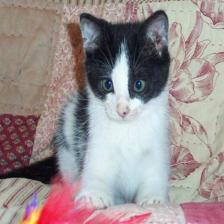

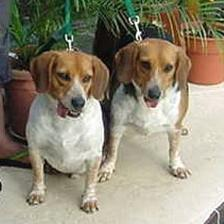

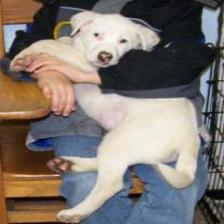

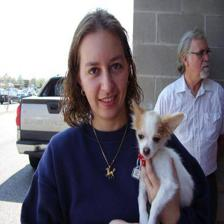

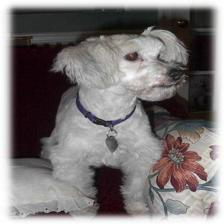

In [24]:
for i in range(5):
  cv2_imshow(dc_images[i])

In [25]:
print(dc_images.shape)

(2000, 224, 224, 3)


In [26]:
X = dc_images
Y = np.asarray(labels)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [29]:
X_train = X_train/255
X_test = X_test/255

In [30]:
print(X_train)

[[[[0.16078431 0.21176471 0.26666667]
   [0.11372549 0.16470588 0.21960784]
   [0.07843137 0.1254902  0.19607843]
   ...
   [0.43921569 0.4745098  0.52941176]
   [0.42745098 0.4627451  0.51764706]
   [0.4        0.43529412 0.49019608]]

  [[0.14117647 0.19215686 0.24705882]
   [0.11764706 0.17647059 0.23921569]
   [0.10196078 0.14901961 0.21960784]
   ...
   [0.38431373 0.41960784 0.4745098 ]
   [0.41176471 0.44705882 0.50196078]
   [0.42745098 0.4627451  0.51764706]]

  [[0.10196078 0.16078431 0.22352941]
   [0.11372549 0.17647059 0.23921569]
   [0.10588235 0.16078431 0.23137255]
   ...
   [0.42745098 0.4627451  0.51764706]
   [0.41568627 0.45098039 0.50588235]
   [0.38039216 0.41568627 0.47058824]]

  ...

  [[0.38823529 0.4        0.45882353]
   [0.40392157 0.41568627 0.4745098 ]
   [0.4745098  0.48627451 0.54509804]
   ...
   [0.55294118 0.54117647 0.6       ]
   [0.42745098 0.41568627 0.4745098 ]
   [0.41176471 0.4        0.45882353]]

  [[0.25098039 0.2627451  0.32156863]
   [0.3

In [31]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization

In [32]:
mobilenet_model = 'https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/tf2-preview-feature-vector/versions/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [33]:
classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    Dense(classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [34]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [35]:
model.compile(
    optimizer = 'adam',
    loss = loss,
    metrics = ['accuracy']
)

In [36]:
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 80s 2s/step - loss: 0.2694 - accuracy: 0.8788
Epoch 2/5
50/50 [==============================] - 73s 1s/step - loss: 0.0756 - accuracy: 0.9712
Epoch 3/5
50/50 [==============================] - 77s 2s/step - loss: 0.0534 - accuracy: 0.9844
Epoch 4/5
50/50 [==============================] - 81s 2s/step - loss: 0.0415 - accuracy: 0.9894
Epoch 5/5
50/50 [==============================] - 84s 2s/step - loss: 0.0331 - accuracy: 0.9925


In [37]:
score, acc = model.evaluate(X_test, Y_test)
print('Test loss =', score)
print('Test acccuracy =',acc*100, '%')

13/13 [==============================] - 24s 2s/step - loss: 0.0606 - accuracy: 0.9750
Test loss = 0.060640543699264526
Test acccuracy = 97.50000238418579 %


Predictive System

In [58]:
images = os.listdir('/content/train')
print(images)
images_path = ['/content/train/'+ img_name for img_name in images]

['cat.2409.jpg', 'dog.740.jpg', 'dog.4890.jpg', 'dog.3503.jpg', 'dog.5186.jpg', 'dog.6744.jpg', 'cat.12140.jpg', 'cat.4386.jpg', 'dog.4587.jpg', 'dog.7239.jpg', 'cat.3696.jpg', 'cat.8299.jpg', 'cat.11016.jpg', 'dog.1082.jpg', 'dog.2993.jpg', 'dog.1371.jpg', 'dog.3888.jpg', 'dog.4805.jpg', 'dog.10488.jpg', 'cat.525.jpg', 'dog.6793.jpg', 'cat.2479.jpg', 'cat.10853.jpg', 'dog.9219.jpg', 'cat.11669.jpg', 'dog.6389.jpg', 'cat.6067.jpg', 'dog.1812.jpg', 'dog.2743.jpg', 'dog.8080.jpg', 'dog.2896.jpg', 'dog.9172.jpg', 'cat.4383.jpg', 'cat.6344.jpg', 'cat.11345.jpg', 'cat.5721.jpg', 'cat.3997.jpg', 'cat.3268.jpg', 'dog.6821.jpg', 'cat.9574.jpg', 'dog.602.jpg', 'dog.3025.jpg', 'dog.12410.jpg', 'cat.852.jpg', 'dog.9942.jpg', 'dog.319.jpg', 'cat.9826.jpg', 'cat.7758.jpg', 'dog.4792.jpg', 'cat.6668.jpg', 'dog.7351.jpg', 'cat.5136.jpg', 'cat.2784.jpg', 'cat.10979.jpg', 'dog.6448.jpg', 'cat.1357.jpg', 'cat.8620.jpg', 'dog.9663.jpg', 'cat.2865.jpg', 'dog.7236.jpg', 'cat.10694.jpg', 'cat.1826.jpg', 'do

In [64]:
print(images_path[5590])

/content/train/cat.2353.jpg


Path of image to be predicted: /content/train/cat.2353.jpg


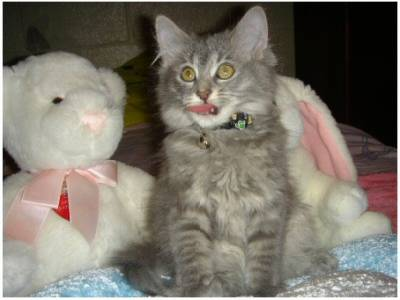

1/1 [==============================] - 0s 152ms/step
[[ 4.2061763 -4.557863 ]]
Its a cat!


In [65]:
input_image_path = input('Path of image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print(input_prediction)
print('Its a',('cat!' if input_pred_label==0 else 'dog!'))